# Практичне завдання 2. Алгоритми дерева рішень і k-найближчих сусідів на реальних датасетах. Виконав Гречин Андрій.

Андрій Русланович, вибачте, що пізно закидаю завдання. Виникли термінові сімейні обтавини через, що я не встиг раніше доробити завдання

## Частина 1. Підготовка даних

a. Завантажити дані згідно варіанту

1. Завантаження даних згідно варіанту (Я обрав наступний датасет -> Варіант 1)

In [ ]:
# import kagglehub

path = '/content/diabetes_012_health_indicators_BRFSS2015.csv'

# print("Path to dataset files:", path)

2. EDA

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(path, encoding='latin-1')

In [ ]:
df.head(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.tail(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,2.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [ ]:
df.shape

(253680, 22)

In [ ]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
df.isnull().sum()

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [ ]:
df.isnull().mean() * 100

,0
Diabetes_012,0.0
HighBP,0.0
HighChol,0.0
CholCheck,0.0
BMI,0.0
Smoker,0.0
Stroke,0.0
HeartDiseaseorAttack,0.0
PhysActivity,0.0
Fruits,0.0


<Axes: >

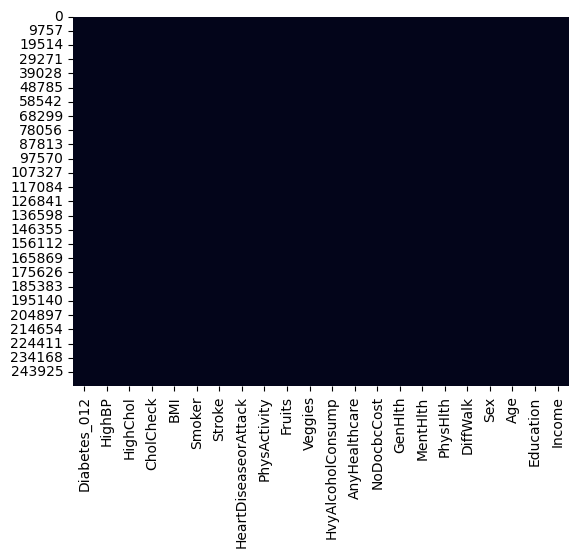

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols].describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


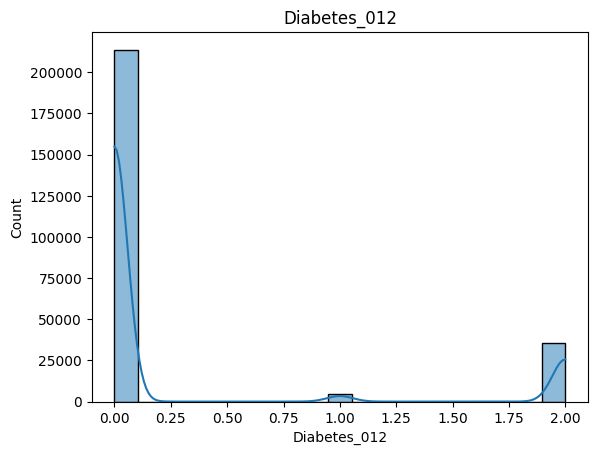

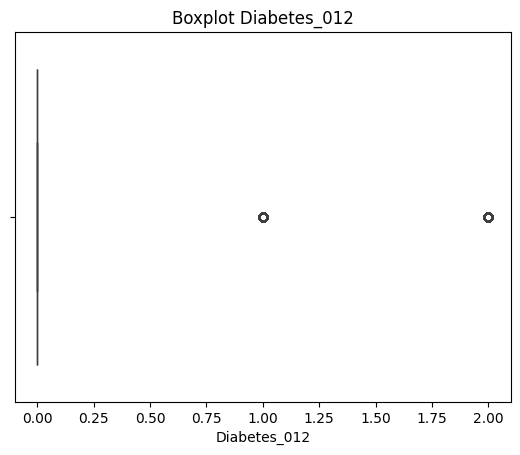

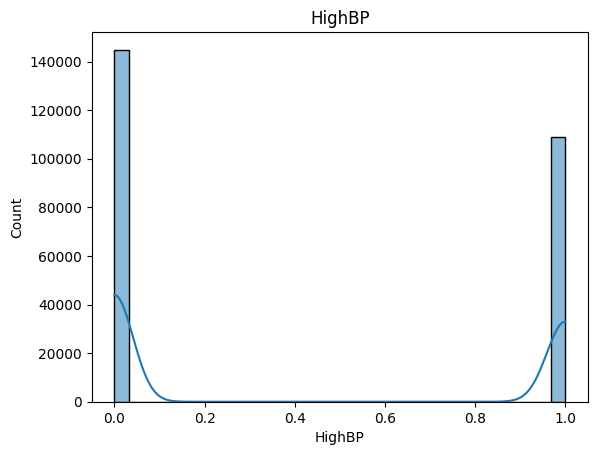

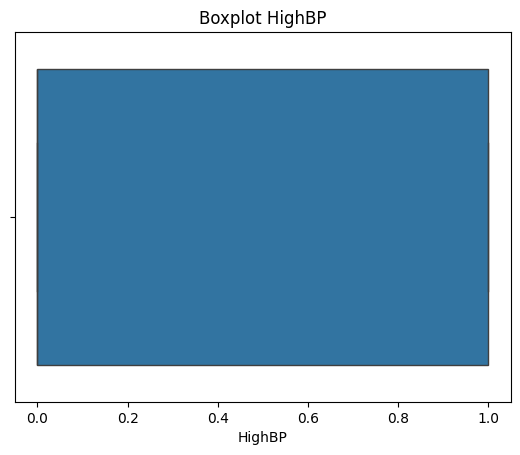

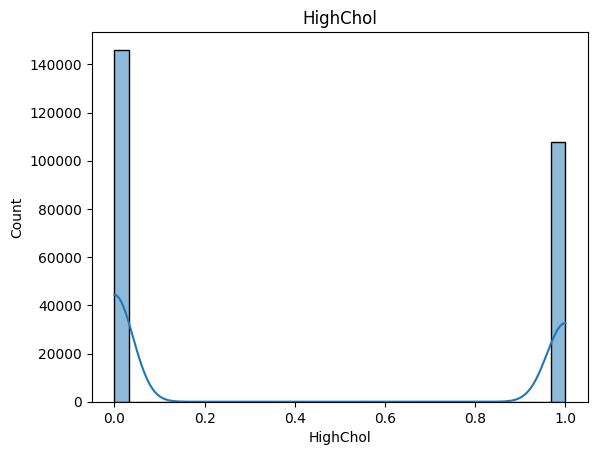

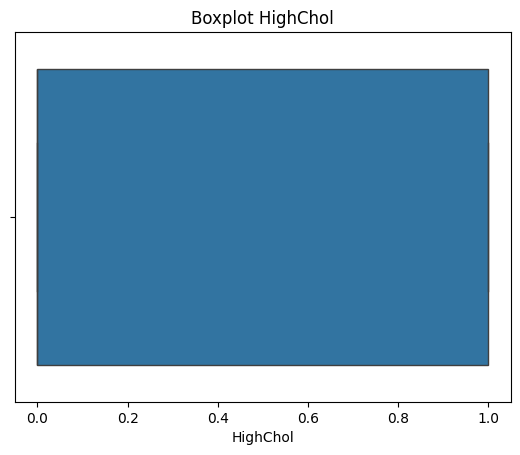

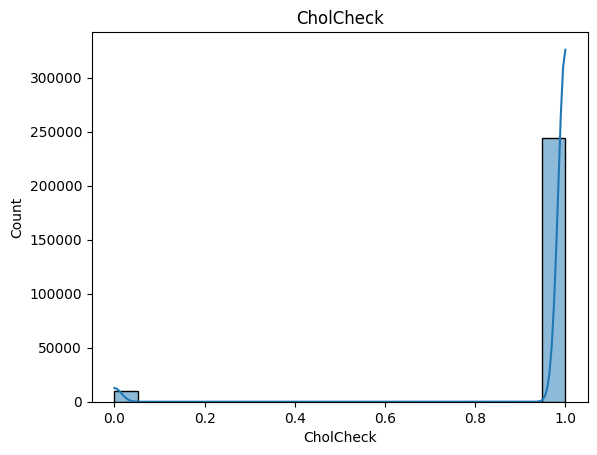

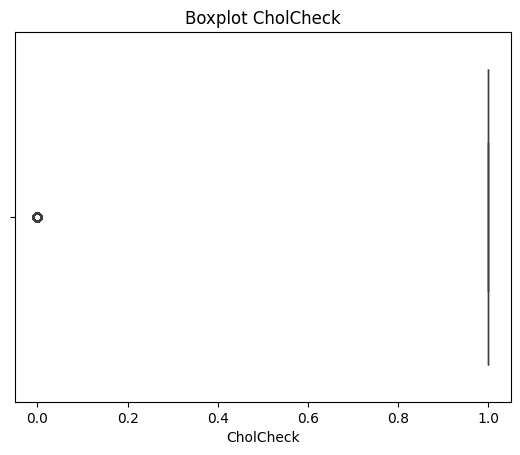

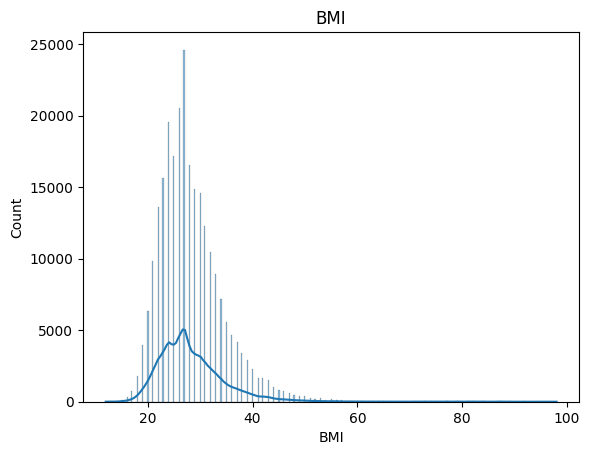

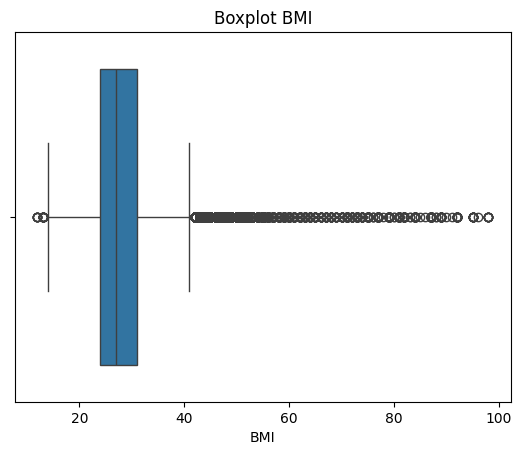

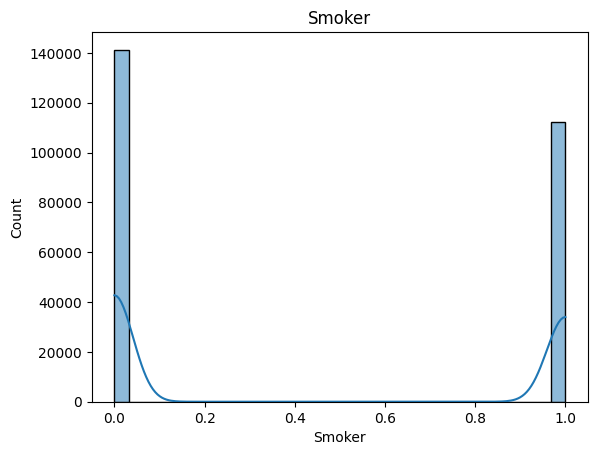

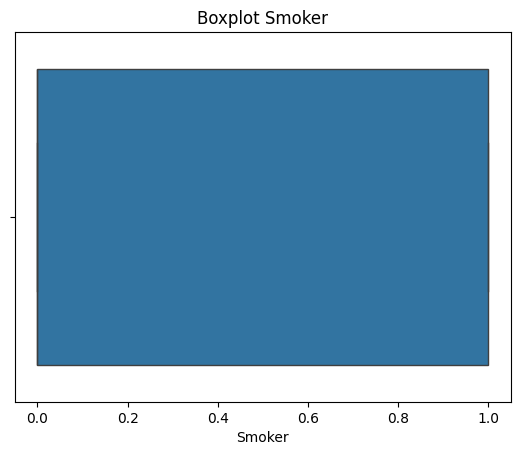

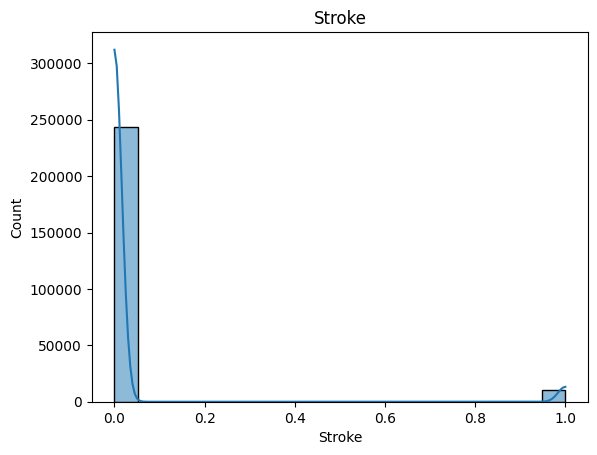

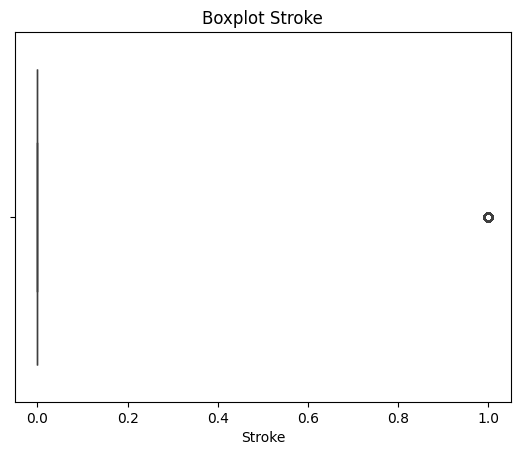

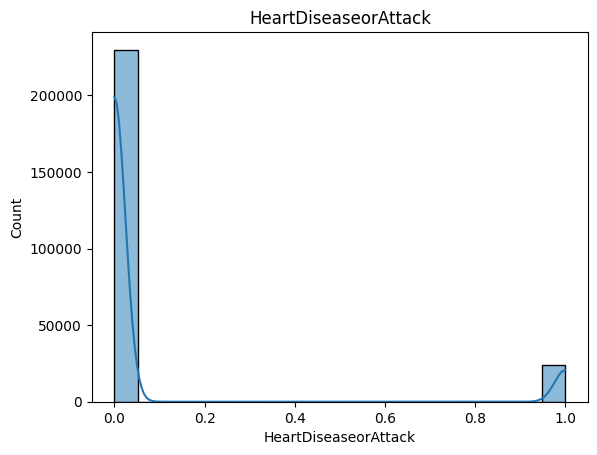

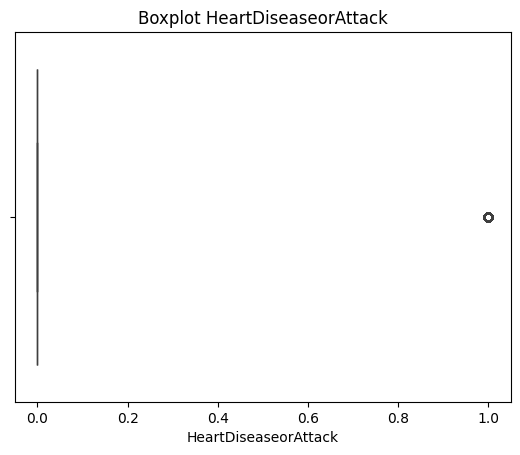

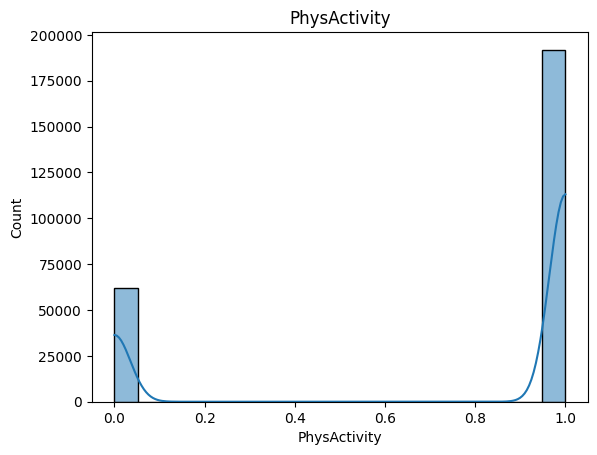

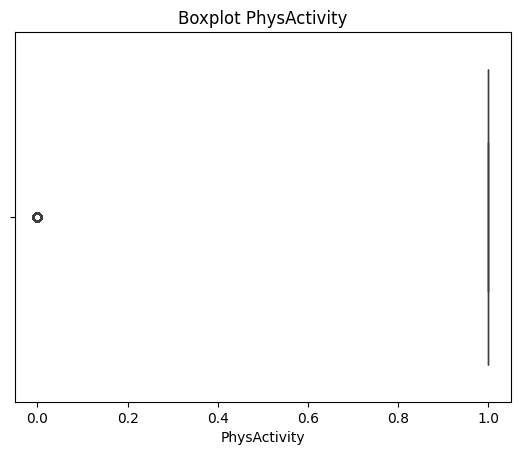

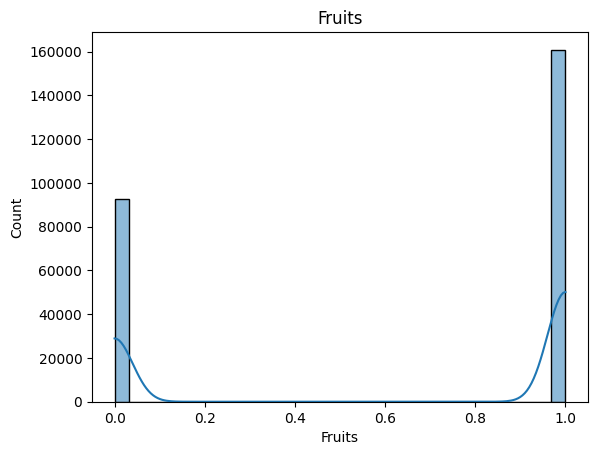

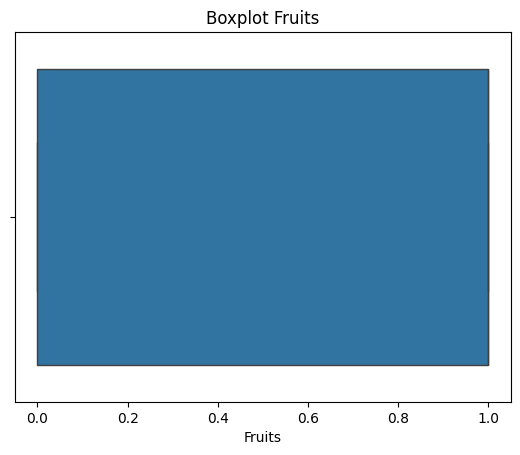

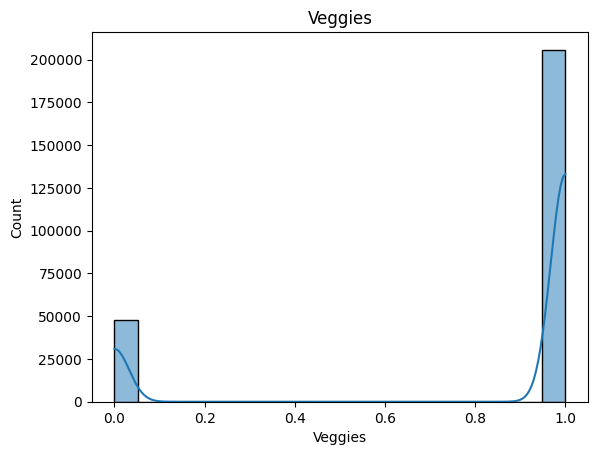

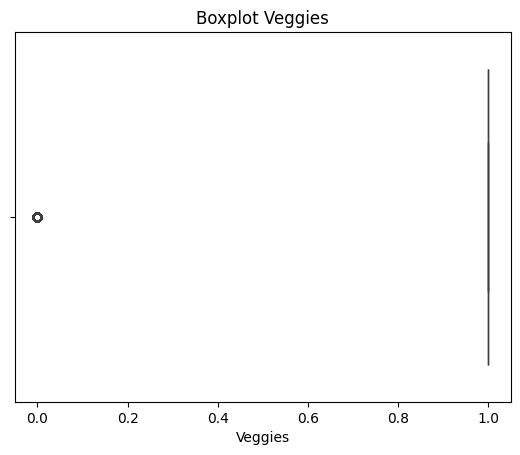

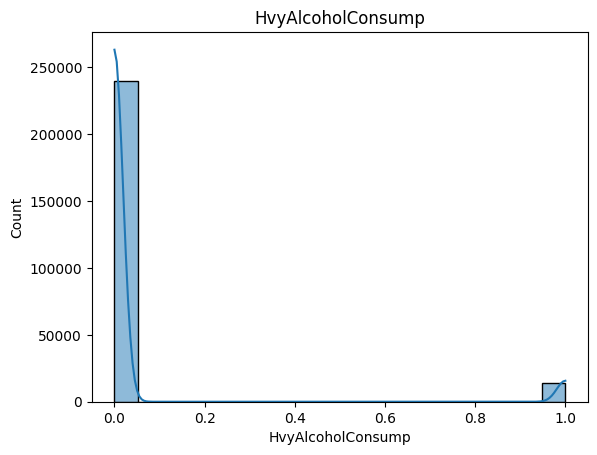

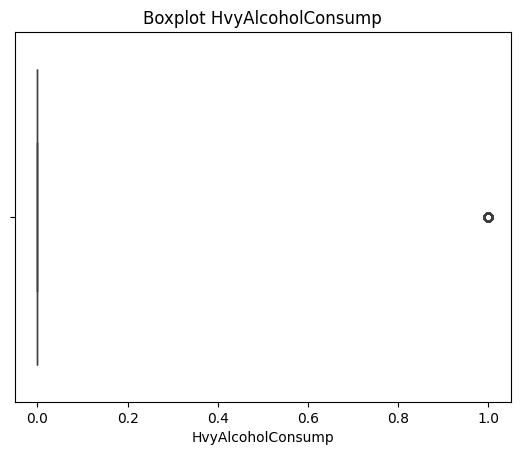

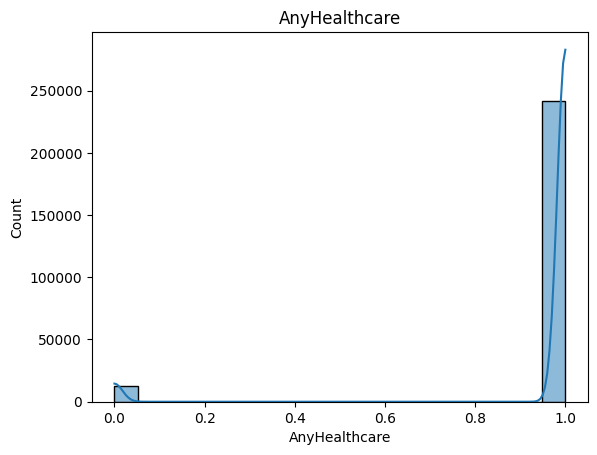

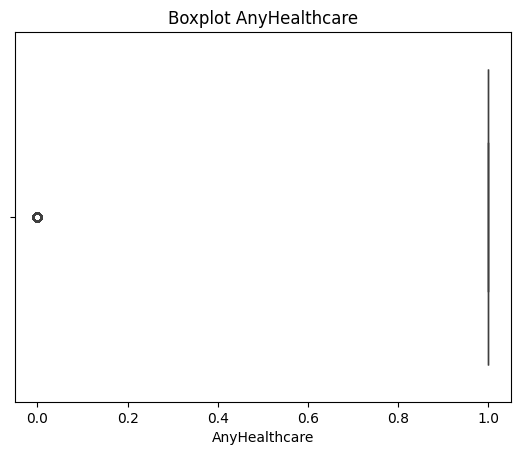

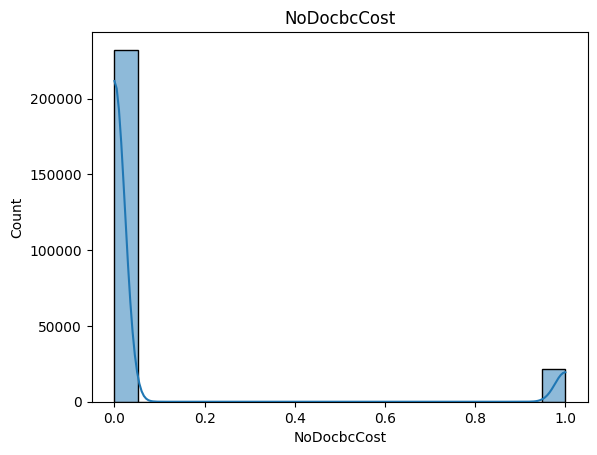

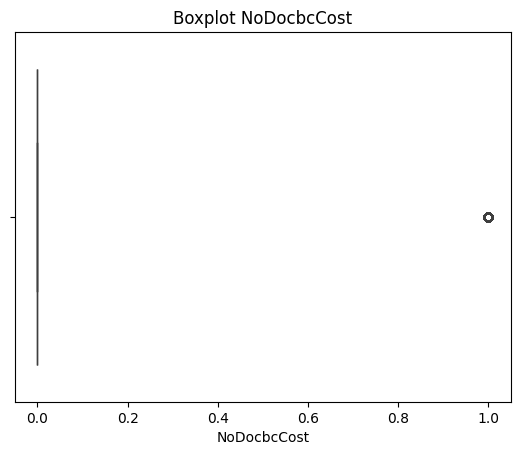

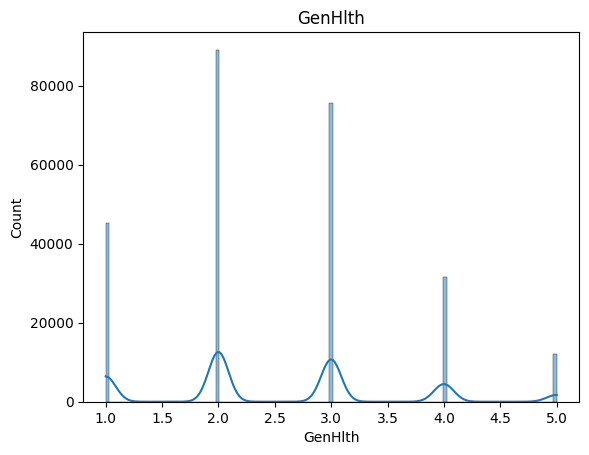

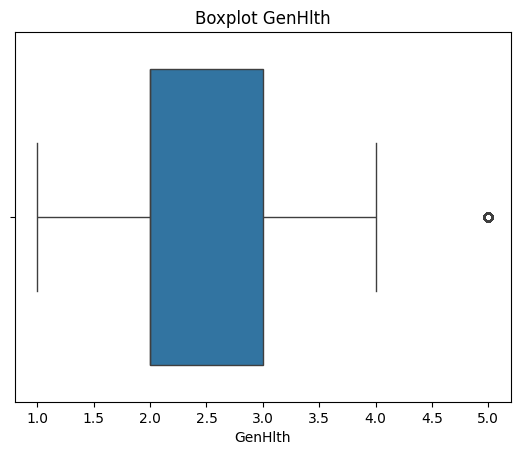

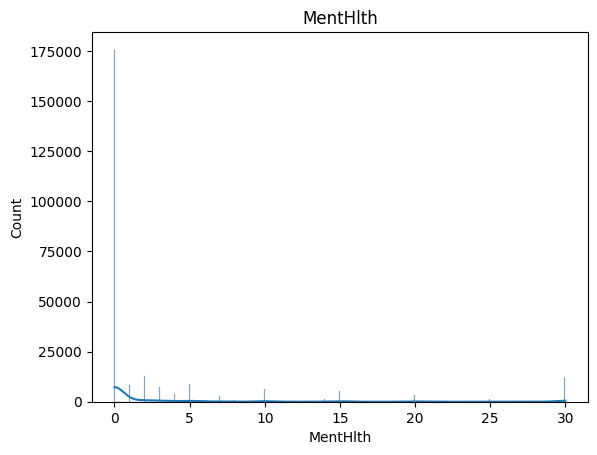

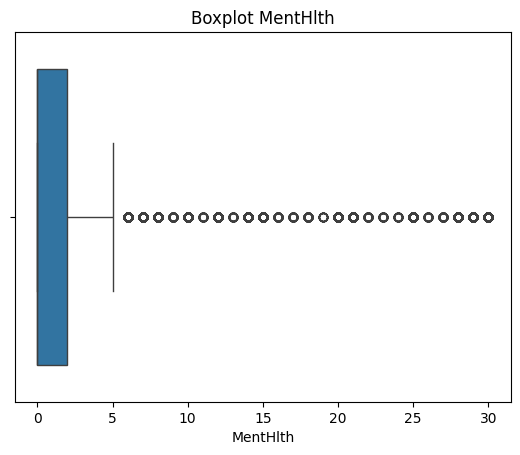

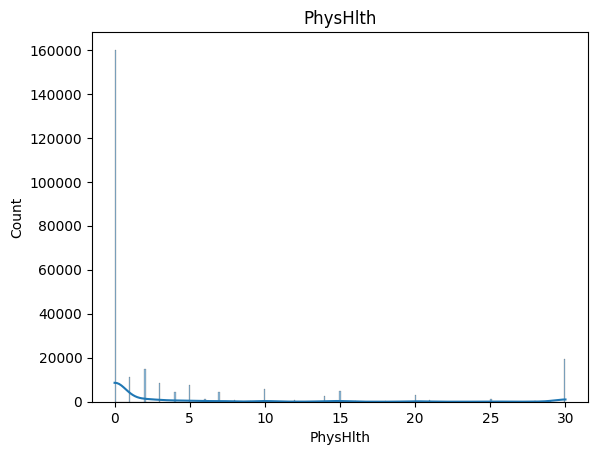

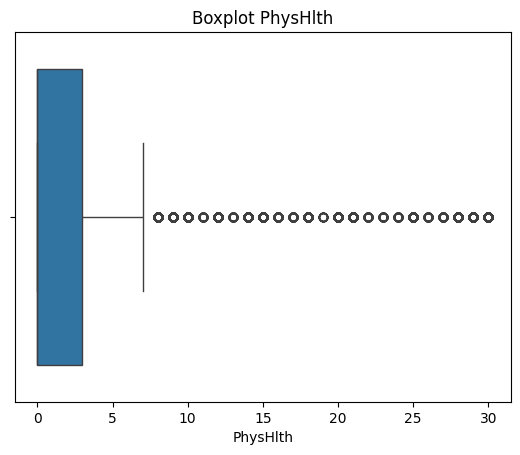

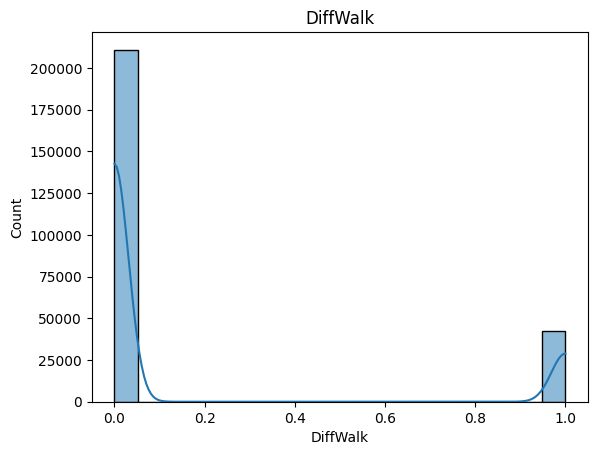

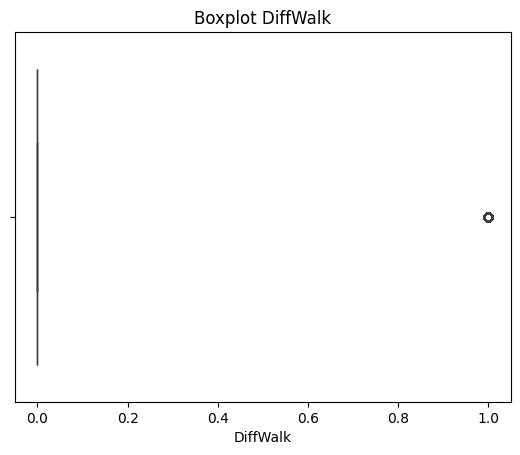

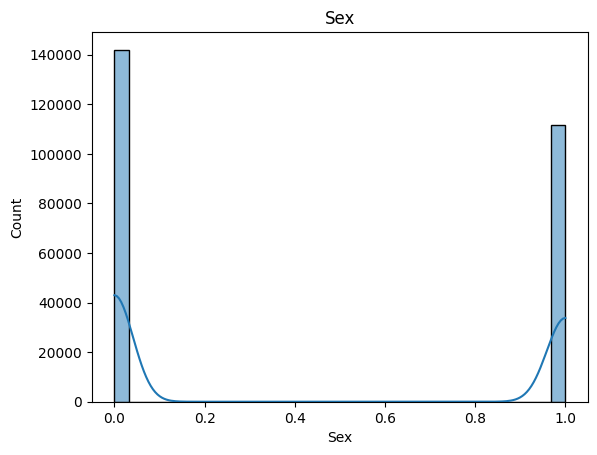

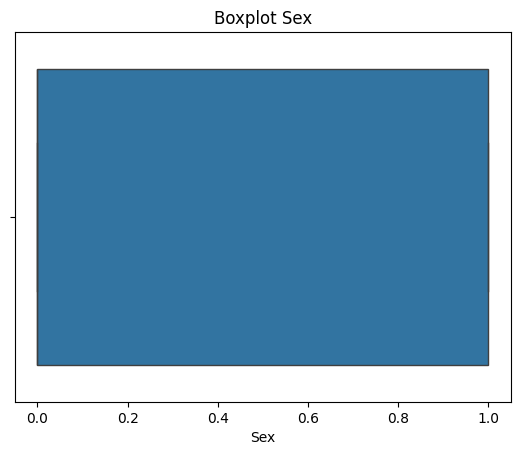

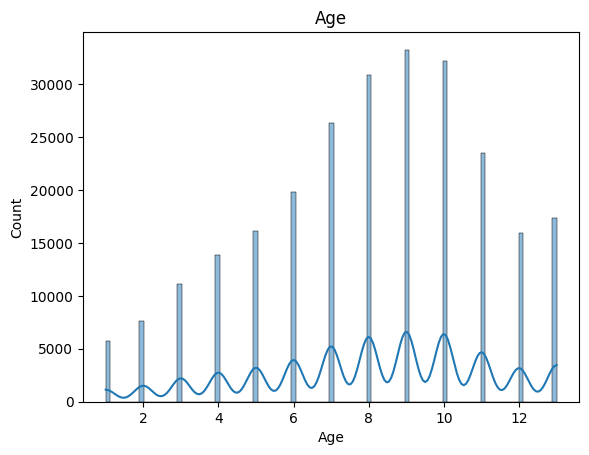

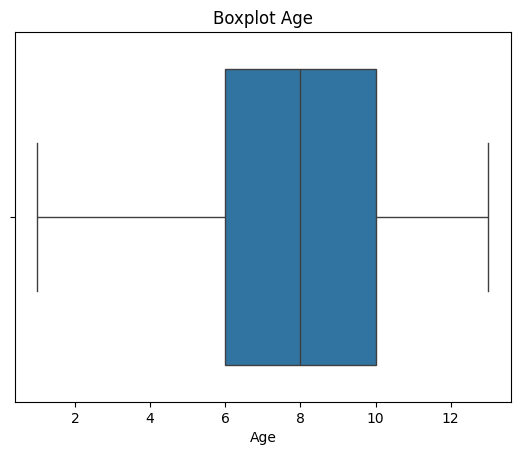

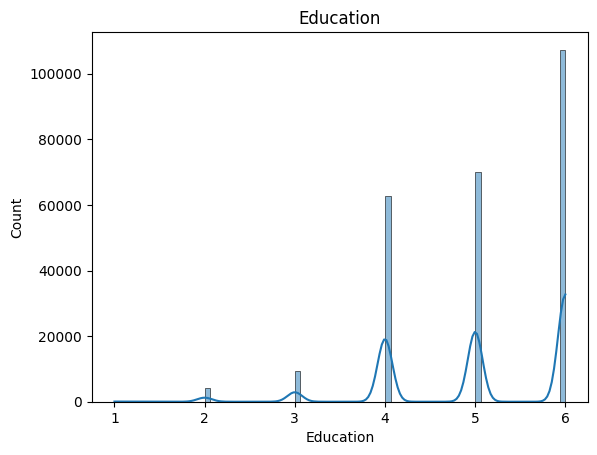

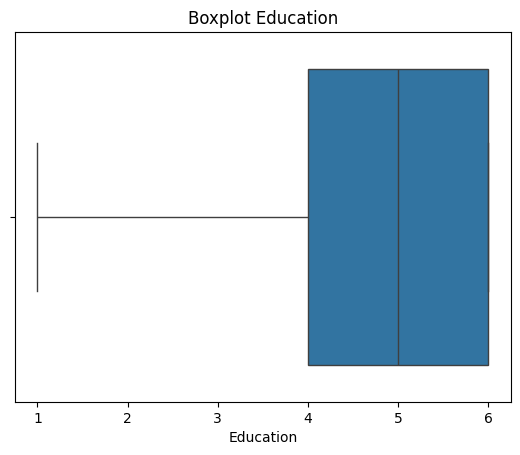

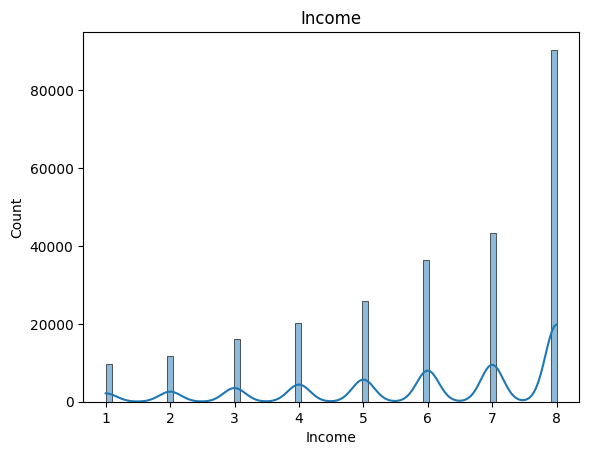

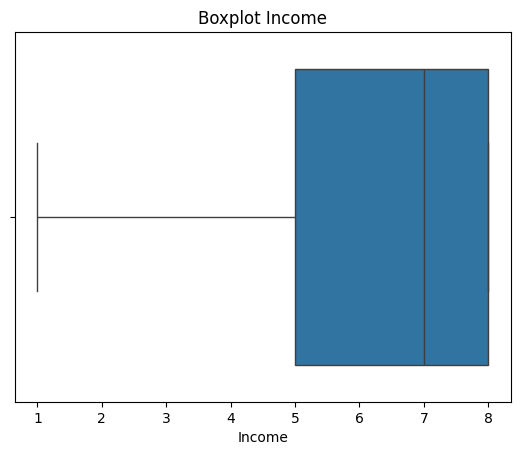

In [ ]:
for col in numeric_cols:
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
    plt.show()

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(df[col].value_counts())
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

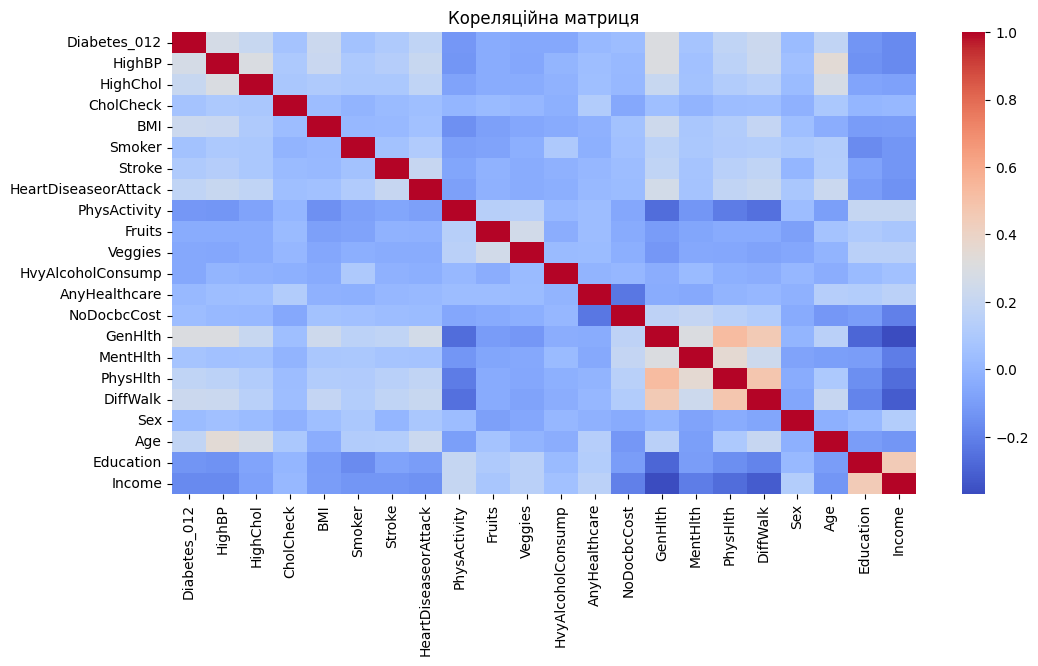

In [ ]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr, ann=True cmap='coolwarm')
plt.title('Кореляційна матриця')
plt.show()

c. Обробити NaN значення – або видаленням, або заповненням середнім, або якимось іншим чином. Обраний варіант обґрунтувати.

  Загалом існує кілька способів уникнути NaN значень:
  - Видалення (Плюси: простий у реалізації метод, не вносить шуму (тобто не створює фальшивих даних). Мінуси: відповідно при видаленні ми позбавляємось даних і таким чином втрачаємо якісь патерни (особливо якщо видалити багато даних))
  - Інтерполювати дані (Плюси: добре підходить для часових рядів або впорядкованих даних. Мінуси: може некоректно працювати для нерегулярних даних і не підходить для категоріальних колонок)
  - Forward/Back filling (Плюси: зберігає шаблони у часових рядах. Мінуси: не підходить для незалежних спостережень)
  - Запровнення певною константою (Плюси: просто. Мінуси: не несе реального змісту і відповідно можу змінити розподіл)

In [ ]:
# Видалення NaN значень з датасету
deleted_nan_df = df.dropna()

In [ ]:
# Середнє значення
df_filled_mean = df.fillna(df.mean(numeric_only=True))

# Медіана
df_filled_median = df.fillna(df.median(numeric_only=True))

# Модою
df_filled_mode = df.fillna(df.mode().iloc[0])

In [ ]:
# Інтреполювання даних

interpolated_df = df.interpolate(inplace=True)

In [ ]:
# Forward Filling

forward_filling_df = df.fillna(method="ffill", inplace=True)  # Forward fill - заповнення попереднього рядка

/tmp/ipython-input-263-2906000653.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  forward_filling_df = df.fillna(method="ffill", inplace=True)  # Forward fill - заповнення попереднього рядка


In [ ]:
# Back Filling

back_filling_df = df.fillna(method="bfill", inplace=True)  # Backward fill - використання наступного рядка

/tmp/ipython-input-264-3085588768.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  back_filling_df = df.fillna(method="bfill", inplace=True)  # Backward fill - використання наступного рядка


In [ ]:
# Заповнення пустих клітинок певним константним значенням
const_values_df = df.fillna(0, inplace=True)

In [ ]:
# Дропнути рядки або колонки з NaN

droped_rows_df = df.dropna(inplace=True)  # рядки
droped_columns_df = df.dropna(axis=1, inplace=True)  # стовпці

b. Розділити на тренувальну, валідаційну та тестові вибірки в пропорції 70/15/15

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Diabetes_012', axis=1)

In [ ]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
y = df['Diabetes_012']

In [ ]:
y

,Diabetes_012
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
253675,0.0
253676,2.0
253677,0.0
253678,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

d. Нормалізувати дані – для тренувальних даних обрахувати значення mean(середнього) та standard deviation(стандартного відхилення) для кожної з ознак і перетворити дані віднявши обраховане середнє та поділивши на стандартне відхилення. Зауважте, що на відміну від Z-score тут немає модуля.

In [ ]:
mean = X_train.mean()
std = X_train.std()

In [ ]:
mean

,0
HighBP,0.428515
HighChol,0.423407
CholCheck,0.962574
BMI,28.379584
Smoker,0.443298
Stroke,0.040518
HeartDiseaseorAttack,0.094585
PhysActivity,0.756915
Fruits,0.634427
Veggies,0.811799


In [ ]:
std

,0
HighBP,0.494865
HighChol,0.494100
CholCheck,0.189804
BMI,6.620722
Smoker,0.496776
Stroke,0.197171
HeartDiseaseorAttack,0.292641
PhysActivity,0.428947
Fruits,0.481592
Veggies,0.390874


In [ ]:
X_train_norm = (X_train - mean) / std

e. Нормалізувати валідаційні та тестові даних на основі обрахованих mean та std для тренувальних даних

In [ ]:
X_val_norm = (X_val - mean) / std
X_test_norm = (X_test - mean) / std

## Частина 2. Побудова дерева рішень

a. Побудувати 3 різні дерева рішень(Decision tree) з різною глибиною на основі даних згідно варіанту.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import plot_tree

In [ ]:
# Глибина дерева буде як гіперпараметр, я обрав 3, 5, 7

In [ ]:
results = {
    "Model": [],
    "Train Time (s)": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

In [ ]:
import time

In [ ]:
# Глибина дерева 3

In [ ]:
dt_depth_3 = DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
start = time.time()
dt_depth_3.fit(X_train, y_train)
dt_3_time = time.time() - start

In [ ]:
print(f"Час витрачений на тренування моделі: {dt_3_time} секунд")

Час витрачений на тренування моделі: 0.24985718727111816 секунд


In [ ]:
y_pred_dt_3 = dt_depth_3.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt_3))

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.92     32150
         1.0       0.00      0.00      0.00       708
         2.0       0.00      0.00      0.00      5194

    accuracy                           0.84     38052
   macro avg       0.28      0.33      0.31     38052
weighted avg       0.71      0.84      0.77     38052



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
results["Model"].append("Decision Tree (max_depth=3)")
results["Train Time (s)"].append(dt_3_time)
results["Accuracy"].append(accuracy_score(y_test, y_pred_dt_3))
results["Precision"].append(precision_score(y_test, y_pred_dt_3, average='weighted'))
results["Recall"].append(recall_score(y_test, y_pred_dt_3, average='weighted'))
results["F1 Score"].append(f1_score(y_test, y_pred_dt_3, average='weighted'))

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt_3)}")
print(f"Precision: {precision_score(y_test, y_pred_dt_3, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_dt_3, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred_dt_3, average='weighted')}")

Accuracy: 0.8448964574792389
Precision: 0.7138500238609674
Recall: 0.8448964574792389
F1 Score: 0.7738645938280256


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[Text(0.5, 0.875, 'x[0] <= 0.5\ngini = 0.271\nsamples = 177576\nvalue = [149523.0, 3206.0, 24847.0]'),
 Text(0.25, 0.625, 'x[13] <= 2.5\ngini = 0.136\nsamples = 101482\nvalue = [94114, 1202, 6166]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[18] <= 9.5\ngini = 0.067\nsamples = 65405\nvalue = [63135, 506, 1764]'),
 Text(0.0625, 0.125, 'gini = 0.047\nsamples = 50927\nvalue = [49708, 277, 942]'),
 Text(0.1875, 0.125, 'gini = 0.136\nsamples = 14478\nvalue = [13427.0, 229.0, 822.0]'),
 Text(0.375, 0.375, 'x[18] <= 6.5\ngini = 0.247\nsamples = 36077\nvalue = [30979.0, 696.0, 4402.0]'),
 Text(0.3125, 0.125, 'gini = 0.153\nsamples = 13580\nvalue = [12462, 211, 907]'),
 Text(0.4375, 0.125, 'gini = 0.298\nsamples = 22497\nvalue = [18517, 485, 3495]'),
 Text(0.75, 0.625, 'x[13] <= 3.5\ngini = 0.409\nsamples = 76094\nvalue = [55409, 2004, 18681]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[13] <= 2.5\ngini = 0.342\nsamples = 55819\nvalue = [44027, 1290, 10502]'),
 Text(0.562

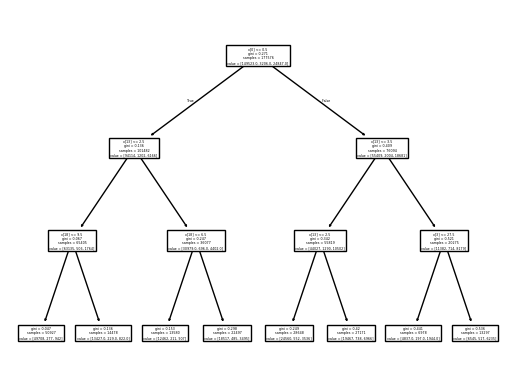

In [ ]:
plot_tree(dt_depth_3)

In [ ]:
# Глибина дерева 5

In [ ]:
dt_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
start = time.time()
dt_depth_5.fit(X_train, y_train)
dt_5_time = time.time() - start

In [ ]:
print(f"Час витрачений на тренування моделі: {dt_5_time} секунд")

Час витрачений на тренування моделі: 0.3618791103363037 секунд


In [ ]:
y_pred_dt_5 = dt_depth_5.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_dt_5))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92     32150
         1.0       0.00      0.00      0.00       708
         2.0       0.58      0.09      0.16      5194

    accuracy                           0.85     38052
   macro avg       0.48      0.36      0.36     38052
weighted avg       0.80      0.85      0.80     38052



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
results["Model"].append("Decision Tree (max_depth=5)")
results["Train Time (s)"].append(dt_5_time)
results["Accuracy"].append(accuracy_score(y_test, y_pred_dt_5))
results["Precision"].append(precision_score(y_test, y_pred_dt_5, average='weighted'))
results["Recall"].append(recall_score(y_test, y_pred_dt_5, average='weighted'))
results["F1 Score"].append(f1_score(y_test, y_pred_dt_5, average='weighted'))

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt_5)}")
print(f"Precision: {precision_score(y_test, y_pred_dt_5, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_dt_5, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred_dt_5, average='weighted')}")

Accuracy: 0.8493114685167665
Precision: 0.8019768502541342
Recall: 0.8493114685167665
F1 Score: 0.7975908285277952


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[Text(0.5, 0.9166666666666666, 'x[0] <= 0.5\ngini = 0.271\nsamples = 177576\nvalue = [149523.0, 3206.0, 24847.0]'),
 Text(0.25, 0.75, 'x[13] <= 2.5\ngini = 0.136\nsamples = 101482\nvalue = [94114, 1202, 6166]'),
 Text(0.375, 0.8333333333333333, 'True  '),
 Text(0.125, 0.5833333333333334, 'x[18] <= 9.5\ngini = 0.067\nsamples = 65405\nvalue = [63135, 506, 1764]'),
 Text(0.0625, 0.4166666666666667, 'x[3] <= 29.5\ngini = 0.047\nsamples = 50927\nvalue = [49708, 277, 942]'),
 Text(0.03125, 0.25, 'x[1] <= 0.5\ngini = 0.032\nsamples = 39967\nvalue = [39311, 159, 497]'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.023\nsamples = 31545\nvalue = [31182, 96, 267]'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.068\nsamples = 8422\nvalue = [8129, 63, 230]'),
 Text(0.09375, 0.25, 'x[18] <= 6.5\ngini = 0.098\nsamples = 10960\nvalue = [10397, 118, 445]'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.063\nsamples = 6157\nvalue = [5958, 48, 151]'),
 Text(0.109375, 0.08333333333333333, 'gini = 0.1

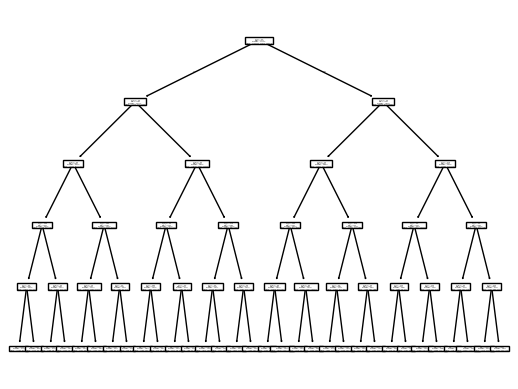

In [ ]:
plot_tree(dt_depth_5)

In [ ]:
# Глибина дерева 7

In [ ]:
dt_depth_7 = DecisionTreeClassifier(max_depth=7, random_state=42)

In [ ]:
start = time.time()
dt_depth_7.fit(X_train, y_train)
dt_7_time = time.time() - start

In [ ]:
print(f"Час витрачений на тренування моделі: {dt_7_time} секунд")

Час витрачений на тренування моделі: 0.5362048149108887 секунд


In [ ]:
y_pred_dt_7 = dt_depth_7.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_dt_7))

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     32150
         1.0       0.00      0.00      0.00       708
         2.0       0.54      0.12      0.20      5194

    accuracy                           0.85     38052
   macro avg       0.47      0.37      0.37     38052
weighted avg       0.80      0.85      0.80     38052



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
results["Model"].append("Decision Tree (max_depth=7)")
results["Train Time (s)"].append(dt_7_time)
results["Accuracy"].append(accuracy_score(y_test, y_pred_dt_7))
results["Precision"].append(precision_score(y_test, y_pred_dt_7, average='weighted'))
results["Recall"].append(recall_score(y_test, y_pred_dt_7, average='weighted'))
results["F1 Score"].append(f1_score(y_test, y_pred_dt_7, average='weighted'))

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt_7)}")
print(f"Precision: {precision_score(y_test, y_pred_dt_7, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_dt_7, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred_dt_7, average='weighted')}")

Accuracy: 0.8488121517922842
Precision: 0.7995630028682056
Recall: 0.8488121517922842
F1 Score: 0.8024709327982558


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[Text(0.5, 0.9375, 'x[0] <= 0.5\ngini = 0.271\nsamples = 177576\nvalue = [149523.0, 3206.0, 24847.0]'),
 Text(0.25, 0.8125, 'x[13] <= 2.5\ngini = 0.136\nsamples = 101482\nvalue = [94114, 1202, 6166]'),
 Text(0.375, 0.875, 'True  '),
 Text(0.125, 0.6875, 'x[18] <= 9.5\ngini = 0.067\nsamples = 65405\nvalue = [63135, 506, 1764]'),
 Text(0.0625, 0.5625, 'x[3] <= 29.5\ngini = 0.047\nsamples = 50927\nvalue = [49708, 277, 942]'),
 Text(0.03125, 0.4375, 'x[1] <= 0.5\ngini = 0.032\nsamples = 39967\nvalue = [39311, 159, 497]'),
 Text(0.015625, 0.3125, 'x[13] <= 1.5\ngini = 0.023\nsamples = 31545\nvalue = [31182, 96, 267]'),
 Text(0.0078125, 0.1875, 'x[19] <= 3.5\ngini = 0.01\nsamples = 14259\nvalue = [14184, 25, 50]'),
 Text(0.00390625, 0.0625, 'gini = 0.059\nsamples = 198\nvalue = [192, 0, 6]'),
 Text(0.01171875, 0.0625, 'gini = 0.01\nsamples = 14061\nvalue = [13992, 25, 44]'),
 Text(0.0234375, 0.1875, 'x[18] <= 5.5\ngini = 0.033\nsamples = 17286\nvalue = [16998, 71, 217]'),
 Text(0.01953125, 0

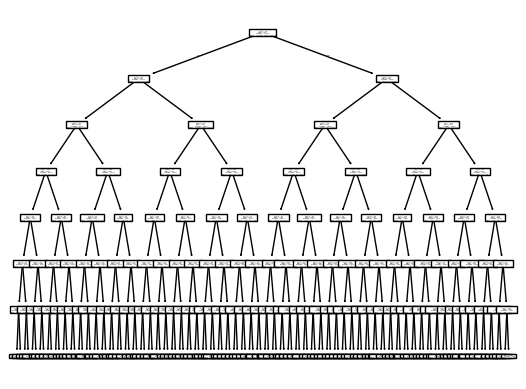

In [ ]:
plot_tree(dt_depth_7)

b. Візуалізувати отримані дерева рішень. Порівняти точність отриманих дерев рішень на валідаційній та тренувальній вибірках.

In [ ]:
results_df = pd.DataFrame(results)

In [ ]:
display(results_df)

,Model,Train Time (s),Accuracy,Precision,Recall,F1 Score
0,Decision Tree (max_depth=3),0.249857,0.844896,0.713850,0.844896,0.773865
1,Decision Tree (max_depth=5),0.361879,0.849311,0.801977,0.849311,0.797591
2,Decision Tree (max_depth=7),0.536205,0.848812,0.799563,0.848812,0.802471


/tmp/ipython-input-309-3371947036.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="Accuracy", ax=axs[0], palette=palette)
/tmp/ipython-input-309-3371947036.py:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(data=results_df, x="Model", y="Accuracy", ax=axs[0], palette=palette)
/tmp/ipython-input-309-3371947036.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="Precision", ax=axs[1], palette=palette)
/tmp/ipython-input-309-3371947036.py:22: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(data=results_df

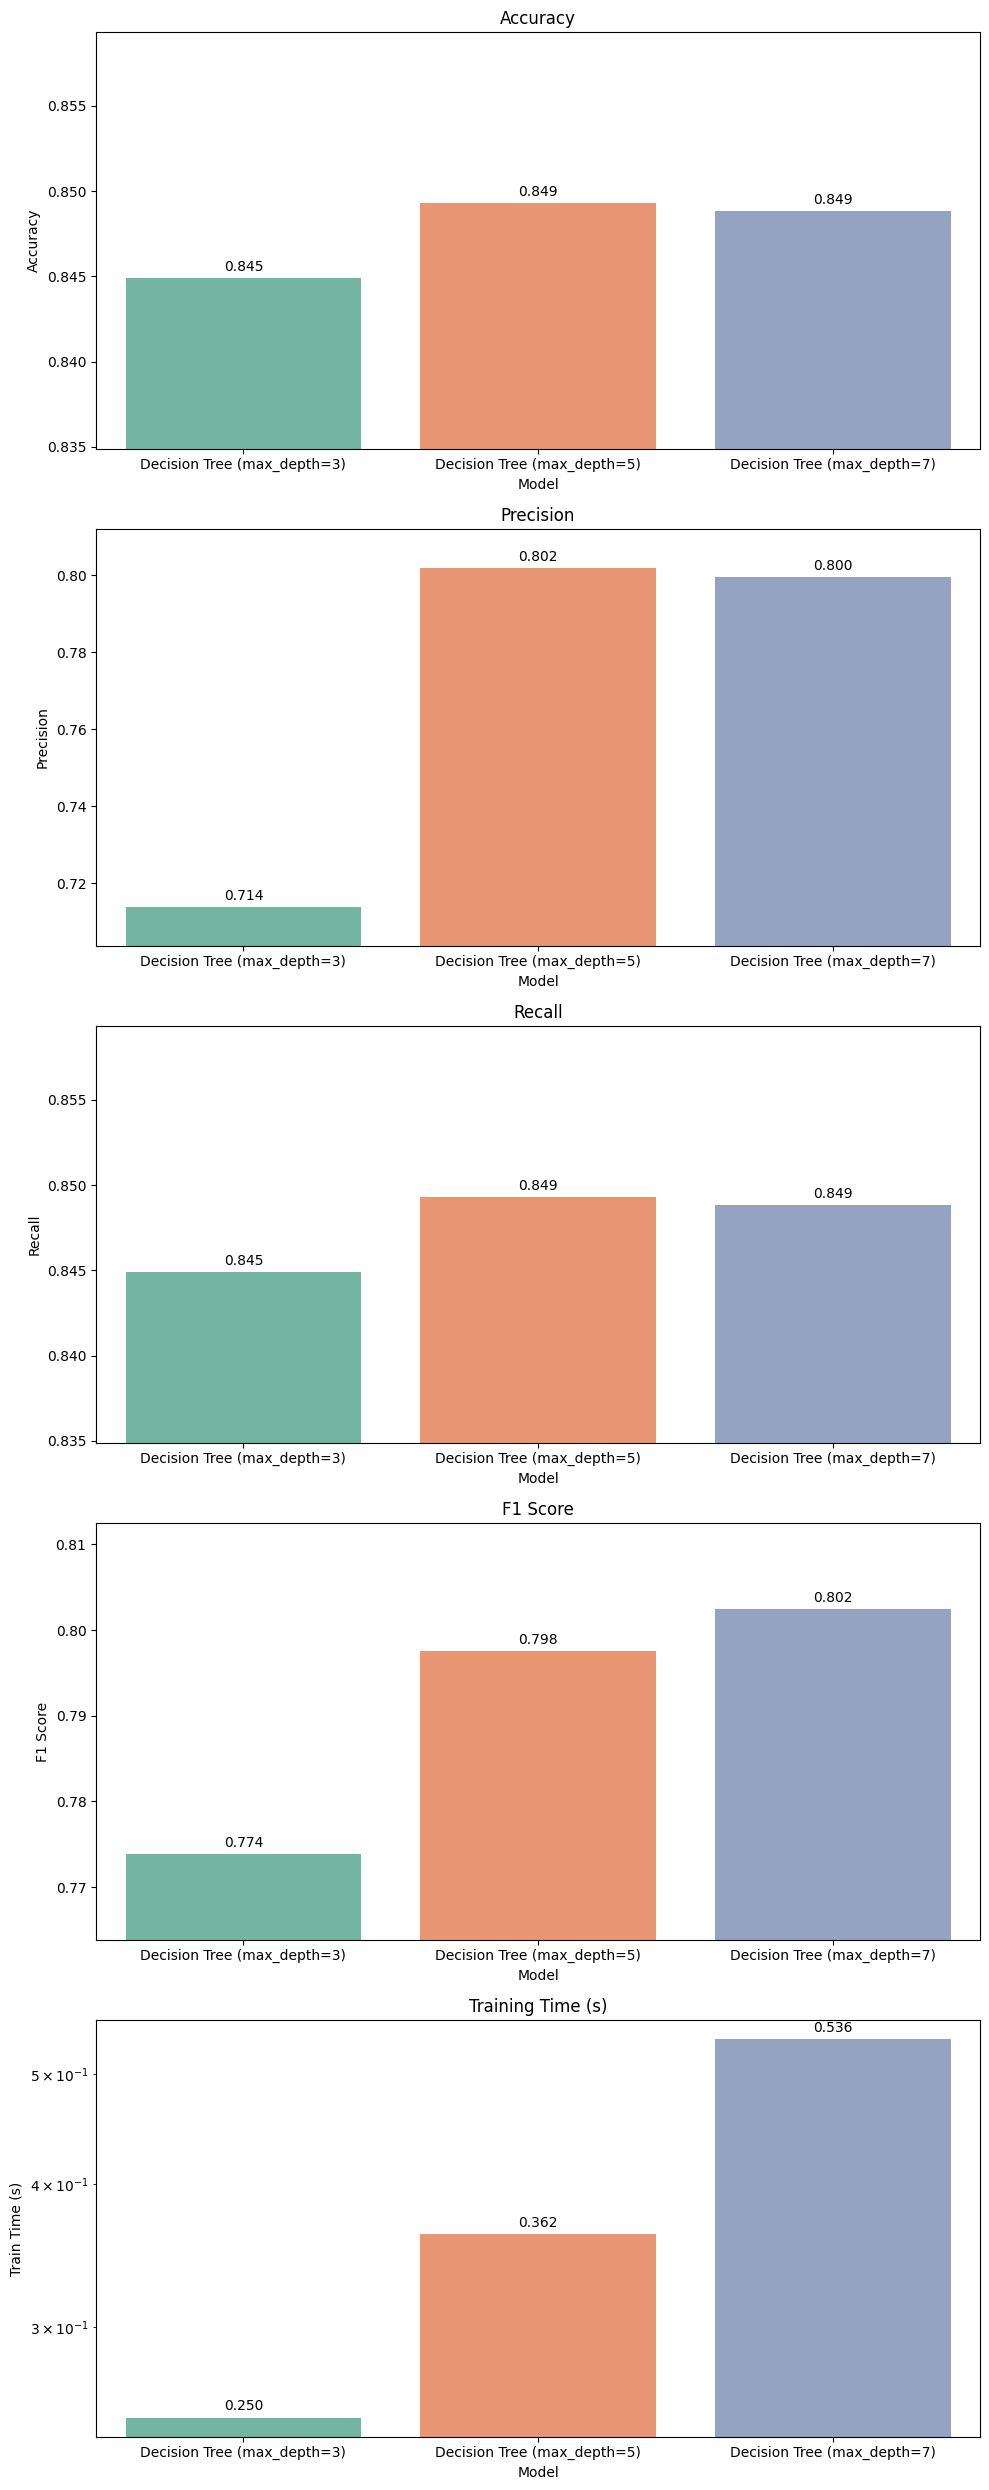

In [ ]:
fig, axs = plt.subplots(5, 1, figsize=(10, 25))

palette = sns.color_palette("Set2")

def annotate_bars(ax):
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', padding=3)

# Функція zoom
def set_zoom(ax, column, margin=0.01):
    min_val = results_df[column].min()
    max_val = results_df[column].max()
    ax.set_ylim(min_val - margin, max_val + margin)

# Accuracy
sns.barplot(data=results_df, x="Model", y="Accuracy", ax=axs[0], palette=palette)
axs[0].set_title("Accuracy")
set_zoom(axs[0], "Accuracy")
annotate_bars(axs[0])

# Precision
sns.barplot(data=results_df, x="Model", y="Precision", ax=axs[1], palette=palette)
axs[1].set_title("Precision")
set_zoom(axs[1], "Precision")
annotate_bars(axs[1])

# Recall
sns.barplot(data=results_df, x="Model", y="Recall", ax=axs[2], palette=palette)
axs[2].set_title("Recall")
set_zoom(axs[2], "Recall")
annotate_bars(axs[2])

# F1 Score
sns.barplot(data=results_df, x="Model", y="F1 Score", ax=axs[3], palette=palette)
axs[3].set_title("F1 Score")
set_zoom(axs[3], "F1 Score")
annotate_bars(axs[3])

# Training Time
sns.barplot(data=results_df, x="Model", y="Train Time (s)", ax=axs[4], palette=palette)
axs[4].set_title("Training Time (s)")
axs[4].set_yscale("log")
annotate_bars(axs[4])

plt.tight_layout()
plt.show()


## Частина 3. Побудова k-nn

a. Побудувати 3 різні k-nn з різним k, типом алгоритму на основі даних згідно варіанту.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
# Для побудови knn я обрав за k = 3, 5, 7

In [ ]:
# k = 3

In [ ]:
knn_3 = KNeighborsClassifier(n_neighbors=3)

In [ ]:
start = time.time()
knn_3.fit(X_train, y_train)
knn_3_time = time.time() - start

In [ ]:
print(f"Час витрачений на тренування моделі: {knn_3_time} секунд")

Час витрачений на тренування моделі: 0.02927398681640625 секунд


In [ ]:
y_pred_knn_3 = knn_3.predict(X_test)

In [ ]:
results["Model"].append("KNN (k=3)")
results["Train Time (s)"].append(knn_3_time)
results["Accuracy"].append(accuracy_score(y_test, y_pred_knn_3))
results["Precision"].append(precision_score(y_test, y_pred_knn_3, average='weighted'))
results["Recall"].append(recall_score(y_test, y_pred_knn_3, average='weighted'))
results["F1 Score"].append(f1_score(y_test, y_pred_knn_3, average='weighted'))

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn_3)}")
print(f"Precision: {precision_score(y_test, y_pred_knn_3, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_knn_3, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn_3, average='weighted')}")

Accuracy: 0.8198517817723115
Precision: 0.780756703019765
Recall: 0.8198517817723115
F1 Score: 0.7971784973709819


In [ ]:
# k = 5

In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors=5)

In [ ]:
start = time.time()
knn_5.fit(X_train, y_train)
knn_5_time = time.time() - start

In [ ]:
print(f"Час витрачений на тренування моделі: {knn_5_time} секунд")

Час витрачений на тренування моделі: 0.028859376907348633 секунд


In [ ]:
y_pred_knn_5 = knn_5.predict(X_test)

In [ ]:
results["Model"].append("KNN (k=5)")
results["Train Time (s)"].append(knn_5_time)
results["Accuracy"].append(accuracy_score(y_test, y_pred_knn_5))
results["Precision"].append(precision_score(y_test, y_pred_knn_5, average='weighted'))
results["Recall"].append(recall_score(y_test, y_pred_knn_5, average='weighted'))
results["F1 Score"].append(f1_score(y_test, y_pred_knn_5, average='weighted'))

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn_5)}")
print(f"Precision: {precision_score(y_test, y_pred_knn_5, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_knn_5, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn_5, average='weighted')}")

Accuracy: 0.832834016608851
Precision: 0.7846007761080932
Recall: 0.832834016608851
F1 Score: 0.8021647468276075


In [ ]:
# k = 7

In [ ]:
knn_7 = KNeighborsClassifier(n_neighbors=7)

In [ ]:
start = time.time()
knn_7.fit(X_train, y_train)
knn_7_time = time.time() - start

In [ ]:
print(f"Час витрачений на тренування моделі: {knn_7_time} секунд")

Час витрачений на тренування моделі: 0.03713083267211914 секунд


In [ ]:
y_pred_knn_7 = knn_7.predict(X_test)

In [ ]:
results["Model"].append("KNN (k=7)")
results["Train Time (s)"].append(knn_7_time)
results["Accuracy"].append(accuracy_score(y_test, y_pred_knn_7))
results["Precision"].append(precision_score(y_test, y_pred_knn_7, average='weighted'))
results["Recall"].append(recall_score(y_test, y_pred_knn_7, average='weighted'))
results["F1 Score"].append(f1_score(y_test, y_pred_knn_7, average='weighted'))

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn_7)}")
print(f"Precision: {precision_score(y_test, y_pred_knn_7, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_knn_7, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn_7, average='weighted')}")

Accuracy: 0.836723431094292
Precision: 0.7937370822032651
Recall: 0.836723431094292
F1 Score: 0.8015294208425238


b. Візуалізувати отримані результати

/tmp/ipython-input-333-3103536015.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="Accuracy", ax=axs[0], palette=palette)
/tmp/ipython-input-333-3103536015.py:15: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(data=results_df, x="Model", y="Accuracy", ax=axs[0], palette=palette)
/tmp/ipython-input-333-3103536015.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="Precision", ax=axs[1], palette=palette)
/tmp/ipython-input-333-3103536015.py:21: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(data=results_df

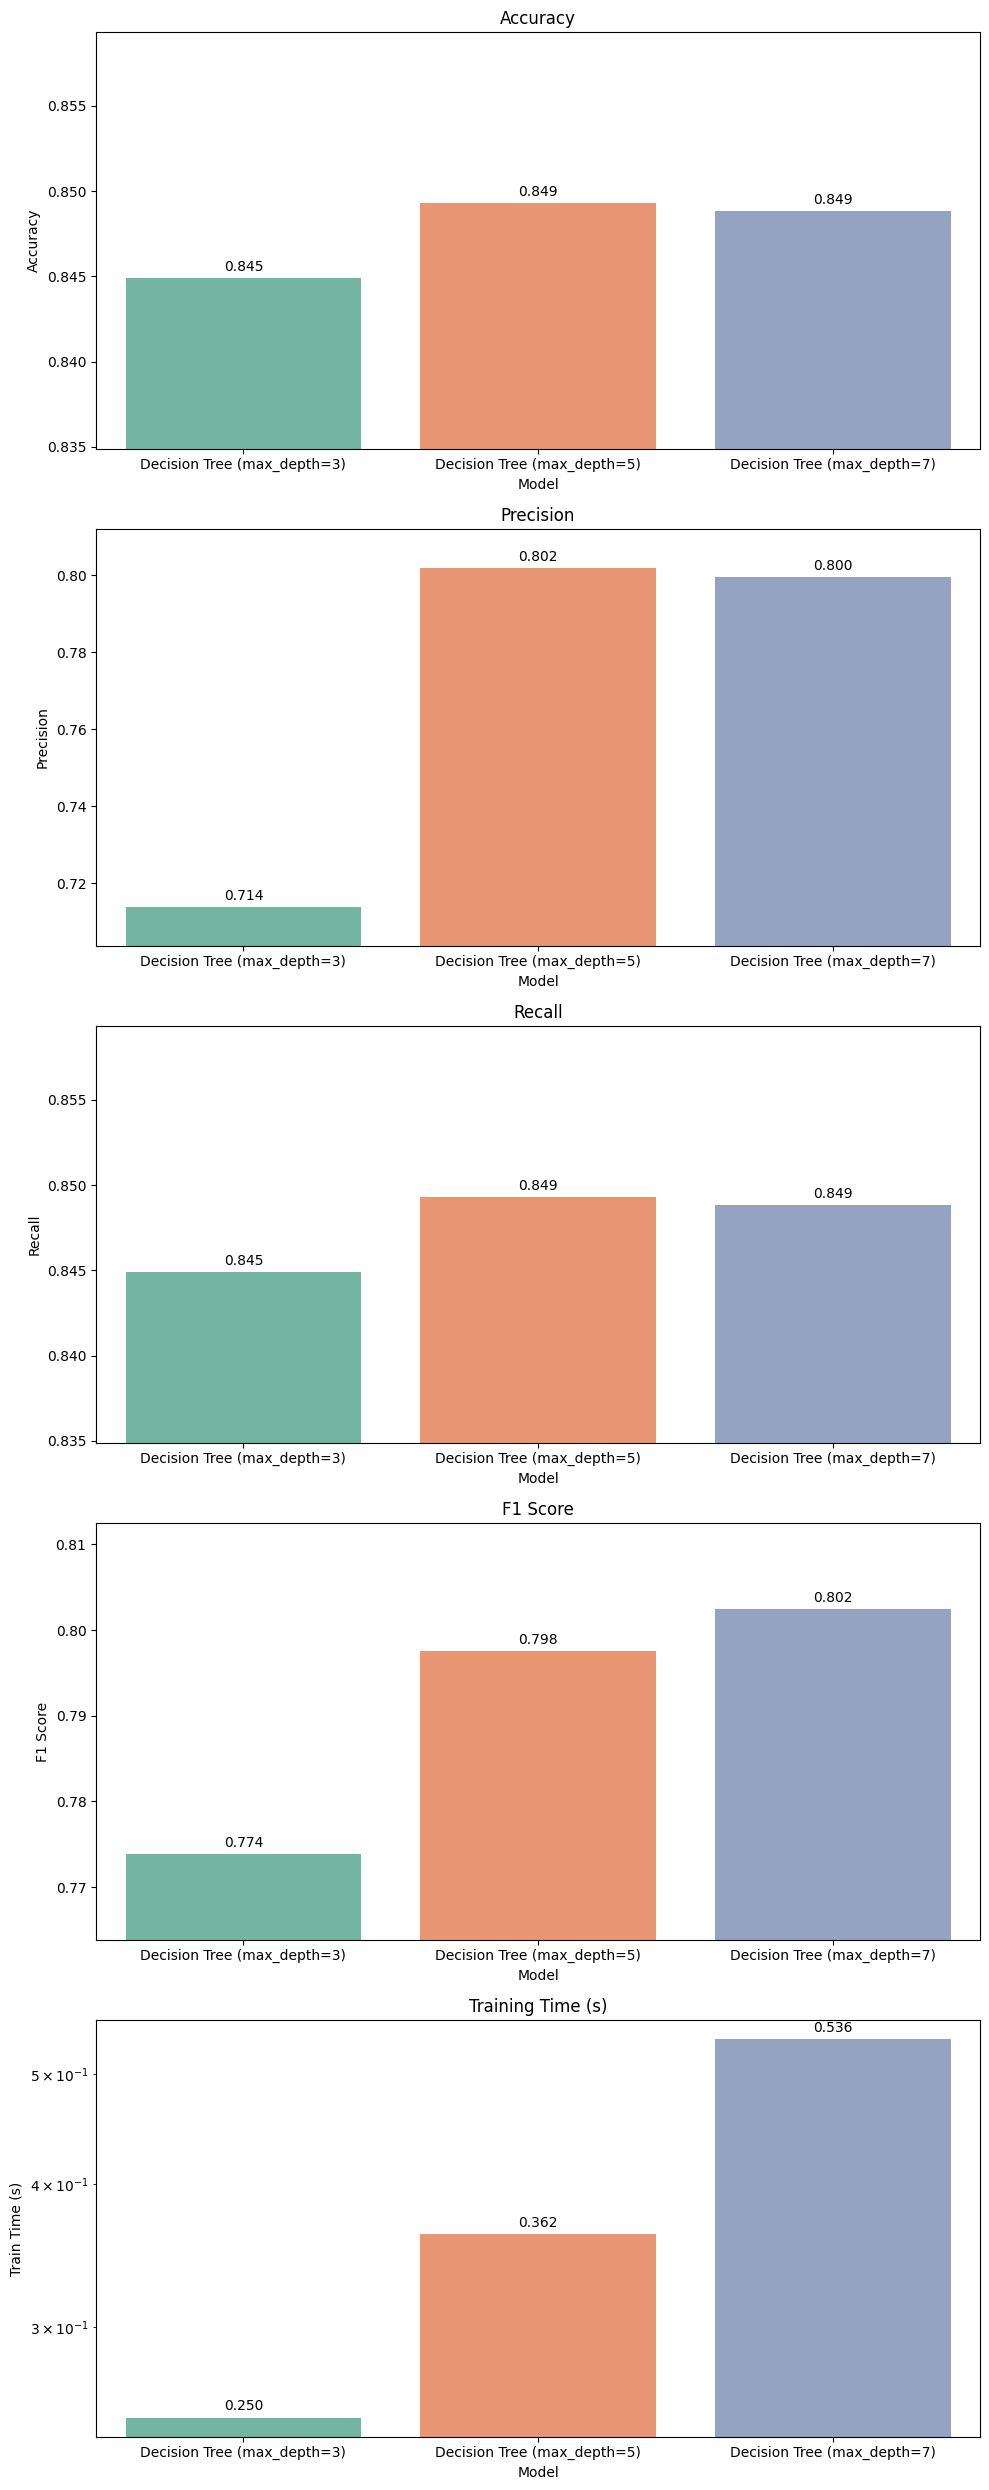

In [ ]:
fig, axs = plt.subplots(5, 1, figsize=(10, 25))

palette = sns.color_palette("Set2")

def annotate_bars(ax):
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', padding=3)

def set_zoom(ax, column, margin=0.01):
    min_val = results_df[column].min()
    max_val = results_df[column].max()
    ax.set_ylim(min_val - margin, max_val + margin)

# Accuracy
sns.barplot(data=results_df, x="Model", y="Accuracy", ax=axs[0], palette=palette)
axs[0].set_title("Accuracy")
set_zoom(axs[0], "Accuracy")
annotate_bars(axs[0])

# Precision
sns.barplot(data=results_df, x="Model", y="Precision", ax=axs[1], palette=palette)
axs[1].set_title("Precision")
set_zoom(axs[1], "Precision")
annotate_bars(axs[1])

# Recall
sns.barplot(data=results_df, x="Model", y="Recall", ax=axs[2], palette=palette)
axs[2].set_title("Recall")
set_zoom(axs[2], "Recall")
annotate_bars(axs[2])

# F1 Score
sns.barplot(data=results_df, x="Model", y="F1 Score", ax=axs[3], palette=palette)
axs[3].set_title("F1 Score")
set_zoom(axs[3], "F1 Score")
annotate_bars(axs[3])

# Training Time
sns.barplot(data=results_df, x="Model", y="Train Time (s)", ax=axs[4], palette=palette)
axs[4].set_title("Training Time (s)")
axs[4].set_yscale("log")
annotate_bars(axs[4])

plt.tight_layout()
plt.show()


## Кінцева валідація

a. Обрахувати метрики, які відповідають задачі, порівняти їх та запропонувати варіанти покращення

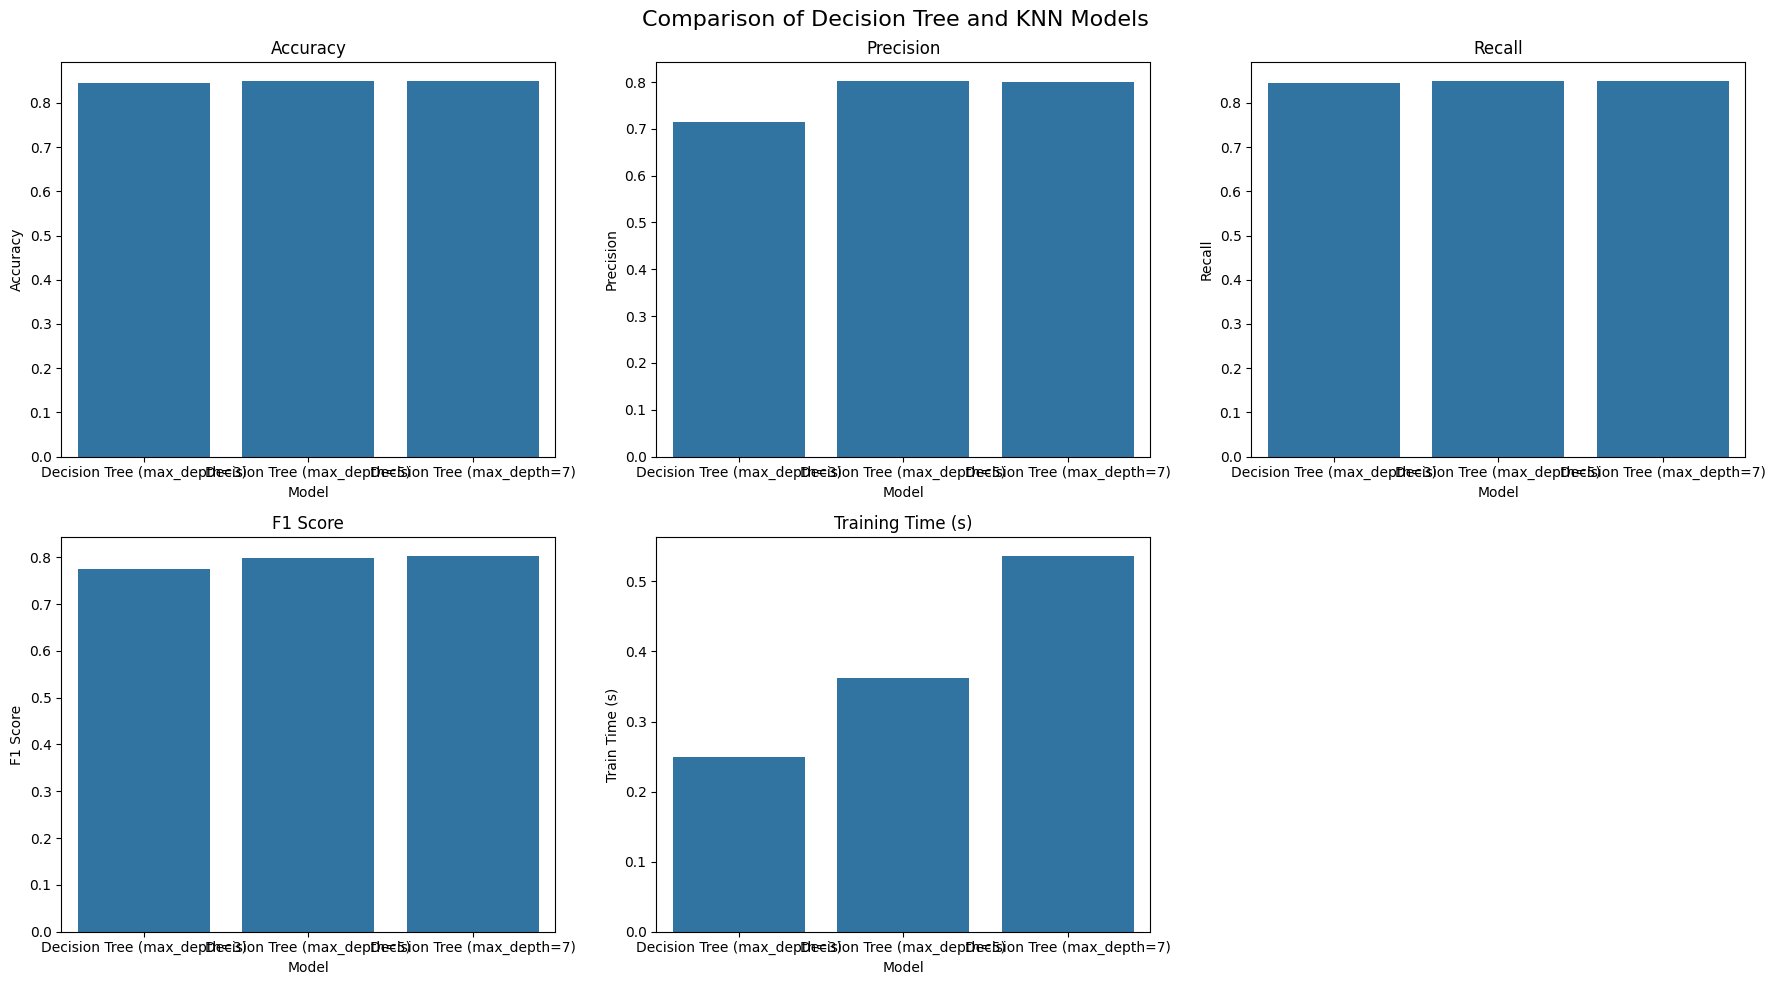

                         Model  Train Time (s)  Accuracy  Precision    Recall  \
0  Decision Tree (max_depth=3)        0.249857  0.844896   0.713850  0.844896   
1  Decision Tree (max_depth=5)        0.361879  0.849311   0.801977  0.849311   
2  Decision Tree (max_depth=7)        0.536205  0.848812   0.799563  0.848812   

   F1 Score  
0  0.773865  
1  0.797591  
2  0.802471  

Найкраща модель за F1 Score:
Model             Decision Tree (max_depth=7)
Train Time (s)                       0.536205
Accuracy                             0.848812
Precision                            0.799563
Recall                               0.848812
F1 Score                             0.802471
Name: 2, dtype: object


In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
sns.barplot(data=results_df, x="Model", y="Accuracy", ax=axs[0,0])
axs[0,0].set_title("Accuracy")
sns.barplot(data=results_df, x="Model", y="Precision", ax=axs[0,1])
axs[0,1].set_title("Precision")
sns.barplot(data=results_df, x="Model", y="Recall", ax=axs[0,2])
axs[0,2].set_title("Recall")
sns.barplot(data=results_df, x="Model", y="F1 Score", ax=axs[1,0])
axs[1,0].set_title("F1 Score")
sns.barplot(data=results_df, x="Model", y="Train Time (s)", ax=axs[1,1])
axs[1,1].set_title("Training Time (s)")
axs[1,2].axis('off')

plt.suptitle("Comparison of Decision Tree and KNN Models", fontsize=16)
plt.tight_layout()
plt.show()

print(results_df)
best_model = results_df.sort_values(by="F1 Score", ascending=False).iloc[0]
print("\nНайкраща модель за F1 Score:")
print(best_model)

In [ ]:
display(results)

{'Model': ['Decision Tree (max_depth=3)',
  'Decision Tree (max_depth=5)',
  'Decision Tree (max_depth=7)',
  'KNN (k=3)',
  'KNN (k=5)',
  'KNN (k=7)'],
 'Train Time (s)': [0.24985718727111816,
  0.3618791103363037,
  0.5362048149108887,
  0.02927398681640625,
  0.028859376907348633,
  0.03713083267211914],
 'Accuracy': [0.8448964574792389,
  0.8493114685167665,
  0.8488121517922842,
  0.8198517817723115,
  0.832834016608851,
  0.836723431094292],
 'Precision': [0.7138500238609674,
  0.8019768502541342,
  0.7995630028682056,
  0.780756703019765,
  0.7846007761080932,
  0.7937370822032651],
 'Recall': [0.8448964574792389,
  0.8493114685167665,
  0.8488121517922842,
  0.8198517817723115,
  0.832834016608851,
  0.836723431094292],
 'F1 Score': [0.7738645938280256,
  0.7975908285277952,
  0.8024709327982558,
  0.7971784973709819,
  0.8021647468276075,
  0.8015294208425238]}

Отже у процесі дослідження датасету методами дерев рішень та k-NN я отрима доволі хороші результати.

Дерева рішень
Зі збільшенням глибини дерева accuracy/recall майже не змінюється, precision помірно покращується і відповідно час збільшується(некритично). Найкращий варіант - це max_depth = 7.

k-NN
Зі збільшенням k accuracy/f1 score зростають, precision також покращується, час є стабільним. Відповідно найкращий варіант - це при k = 7

На мою думку існує кілька можливих методів покращити результати метрик:
  1. Зробити Feature Engeenering
  2. Використати StandardScaler або MinMaxScaler
  3. Провести балансування вибірки, щоб не було дизбалансу класів
  4. Можливо спробувати інші гіперпараметри (використати GridSearchCV)
  5. Спробувати іншу модель? (Random Forest)
  6. Крос-валідація  

## Питання для самоконтролю

1) Що таке дерева прийняття рішень?

Дерева прийняття рішень - це один з алгоритмів машинного навчання, який застосовується для задач типу 'навчання з учителем' (supervised learning), а саме класифікації та регресії. Суть полягає у тому, що ми будуємо дерево, у якому кожен вузол (нода) відіграє роль певної умови по якій приймається рішення, а кожна гілка - це результат цієї умови (або перехід до іншої умови). Наприклад умовою є 'Чи їсть істота часник?' -> Якщо так, то вона не вампір, а якщо не їсть, то можливо вона вампір. Кінцеві вузли в цьому дереві є передбаченнями або рішенням задачі.

2) Яким чином відбувається розбиття на піддерева/листки в деревах прийняття рішень?

Алгоритм рекурсивно ділить дані на основі обраної ознаки, щоб мінімізувати невизначеність (ентропію) у кожній підмножині.

Алгоритм
  1. Оцінка кожної ознаки ()
  2. Вибір найкращого розбиття
  3. Розділення вибірки
  4. Рекурсивна побудова
  5. Завершення рекурсії побудови або досягнення умов, тобто ентропія = 0 або досягнуто max_depth


3) Що таке Ентропія та Information gain? Яку роль вони грають в деревах прийняття рішень?

Ентропія - це міра невизначеності або хаосу в даних. з теорії інфорамації я пам'ятаю, що вона визначається як мінус (сума всіх ймовірностей на логарифм цієї ймовірності).
Information Gain (IG) - це величина, яка обчислюється як різниця між ентропією до поділу і після поділу ознак.
Вони грають велику роль у алгоритмі дерев рішень, оскільки дають змогу правильно обрати за якою ознакою розбивати на підмножини. Тобто обчислюємо IG для кожної ознаки і вибираємо ту, яка дає найбільший IG, після цього дані розділяються за цією ознакою.

4) Що таке k-NN?

k-NN - це один з алгоритмів машинного навчання, який використовується для класифікації та регресії(Схожі об'єкти мають схожі мітки). Його ідея полягає у тому, що він обчислює відстані до кожних точок навчальної вибірки, вибирає k найближчих сусідів. Відстані можуть бути: Манхетенська, Евклідова або використовують  косинусні відстані (у векторних бд).

5) Поясніть чому на вашу думку ви отримали кращі/гірші результати на різних алгоритмах

Різні алгоритми дали різні результати через особливості їхньої роботи та чутливості до даних. Наприклад KNN показав кращі результати після, бо він сильно залежить від масштабів ознак. (Без нормалізації відстань між точками втрачає сенс). Дерева рішень показали непогані результати, але при великій глибині схильні до перенавчання. Random Forest виявився одним з найстабільніших алгоритмів оскільки поєднює багато дерев і зменшує ризик до перенавчання і краще (як я зрозумів) справляється з шумами.

## Додаткова частина (завдання із зірочкою) Crime Spatial Dataset